In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../artifacts/raw/data.csv")

In [3]:
# Display the first 5 rows of the dataframe
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Display summary information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Check for missing values in the dataframe
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.duplicated().sum()

In [ ]:
# Display statistical summary of the dataframe
df.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.00,150.00,150.00,150.00,150.00
mean,75.50,5.84,3.05,3.76,1.20
std,43.45,0.83,0.43,1.76,0.76
min,1.00,4.30,2.00,1.00,0.10
25%,38.25,5.10,2.80,1.60,0.30
50%,75.50,5.80,3.00,4.35,1.30
75%,112.75,6.40,3.30,5.10,1.80
max,150.00,7.90,4.40,6.90,2.50


In [ ]:
# Count of each species in the dataset
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
df.drop("Id" , axis=1 ,inplace=True)

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.10,3.50,1.40,0.20,Iris-setosa
1,4.90,3.00,1.40,0.20,Iris-setosa
2,4.70,3.20,1.30,0.20,Iris-setosa
3,4.60,3.10,1.50,0.20,Iris-setosa
4,5.00,3.60,1.40,0.20,Iris-setosa


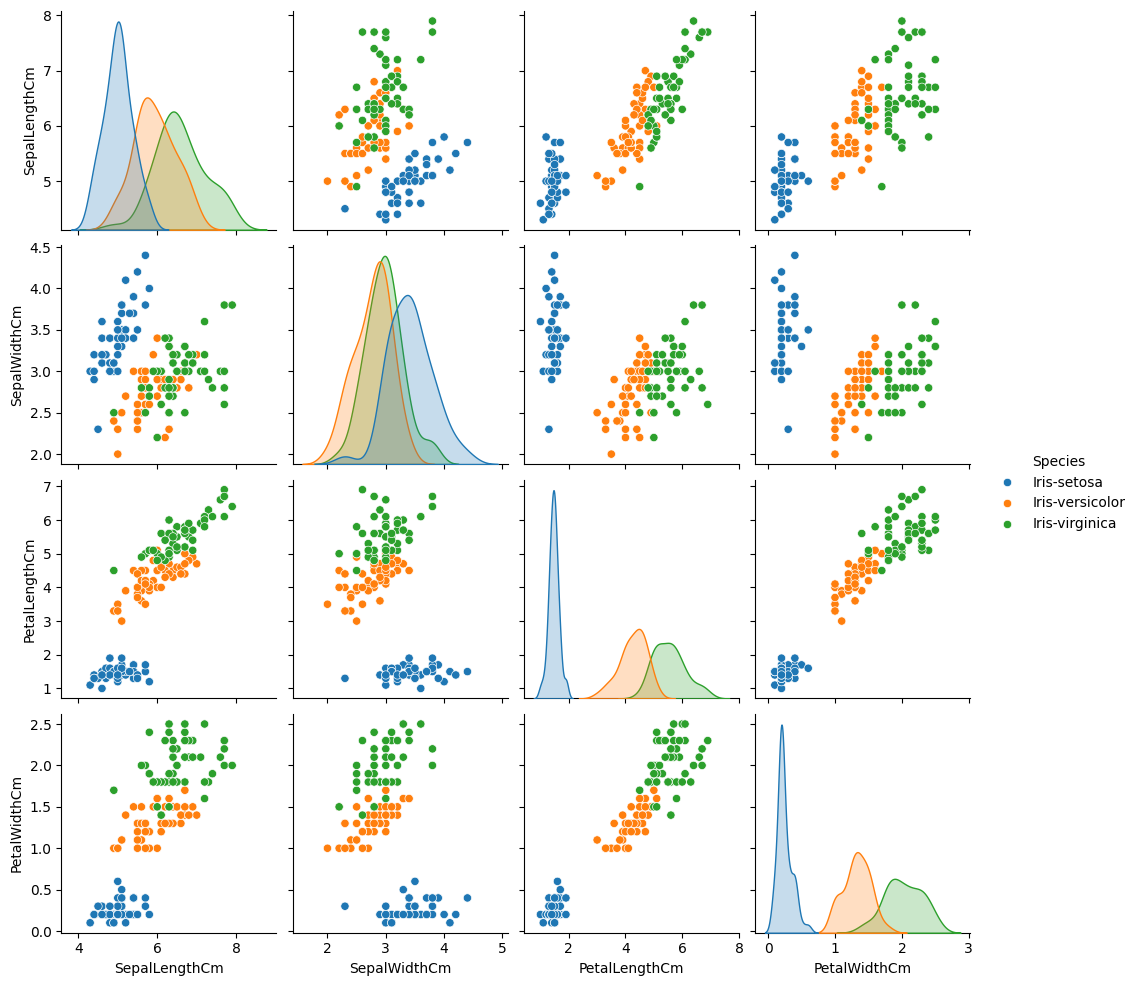

In [ ]:
sns.pairplot(df , hue="Species")
plt.show()

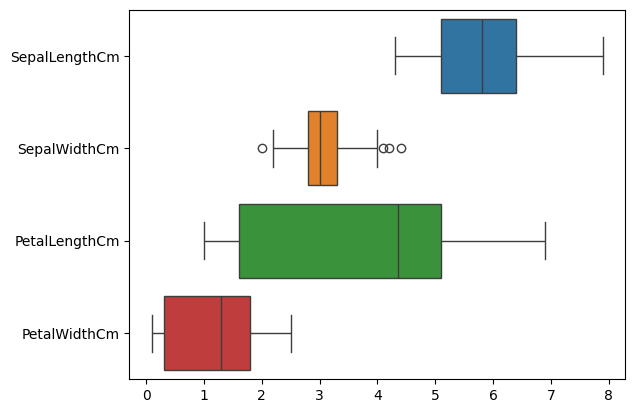

In [ ]:
sns.boxplot(data=df , orient="h")
plt.show()

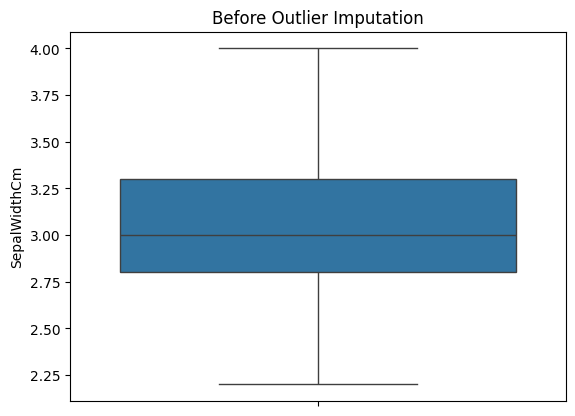

In [19]:
sns.boxplot(df["SepalWidthCm"])
plt.title("Before Outlier Imputation")
plt.show()

In [ ]:
Q1 = df["SepalWidthCm"].quantile(0.25)
Q3 = df["SepalWidthCm"].quantile(0.75)

IQR = Q3-Q1

Lower_value = Q1 - 1.5*IQR
Upper_value = Q3 + 1.5*IQR

sepal_median = np.median(df["SepalWidthCm"])


In [14]:
sepal_median

np.float64(3.0)

In [ ]:
df["SepalWidthCm"] = df["SepalWidthCm"].where(
    (df["SepalWidthCm"] >= Lower_value) & (df["SepalWidthCm"] <= Upper_value),
    sepal_median
)

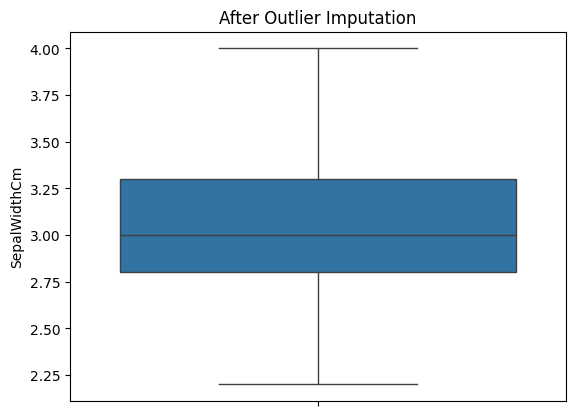

In [18]:
sns.boxplot(df["SepalWidthCm"])
plt.title("After Outlier Imputation")
plt.show()

### MODEL TRAINING USING DT

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix

In [21]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [22]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y = df["Species"]

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,Y , test_size=0.2 , random_state=42)

In [24]:
tree_clf = DecisionTreeClassifier(criterion="gini" , max_depth=30 , random_state=42)

In [25]:
tree_clf.fit(X_train,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",30
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current n

In [26]:
y_pred = tree_clf.predict(X_test)

In [28]:
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [29]:
accuracy = accuracy_score(y_test , y_pred)

In [30]:
accuracy

1.0

In [31]:
conf_matrix = confusion_matrix(y_test,y_pred)

In [32]:
conf_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

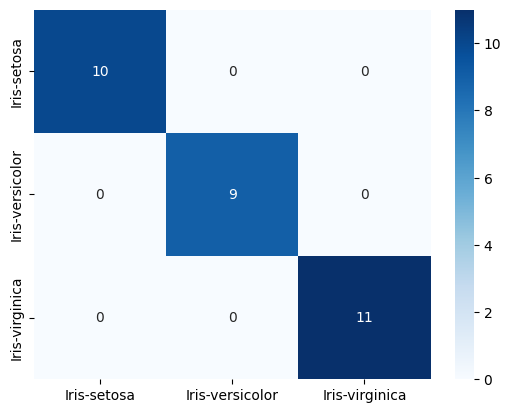

In [33]:
sns.heatmap(conf_matrix,annot=True , cmap="Blues" , xticklabels=tree_clf.classes_ , yticklabels=tree_clf.classes_)
plt.show()

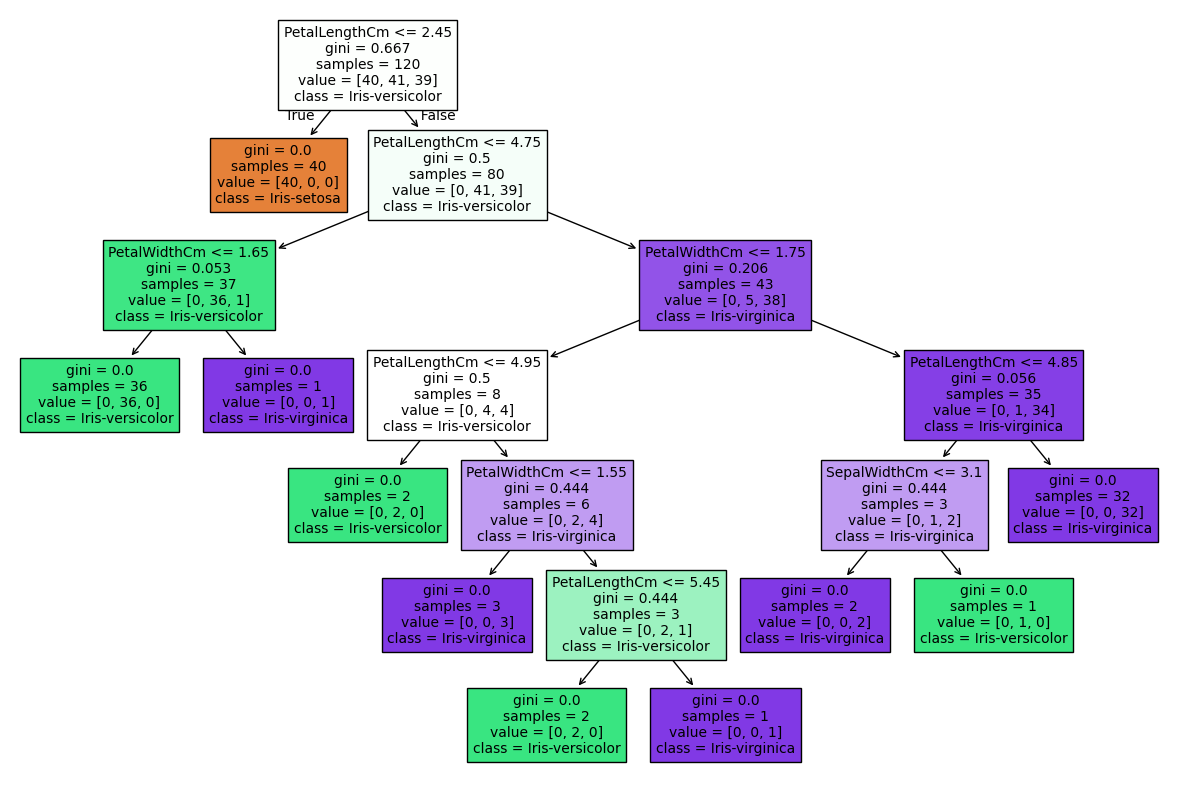

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(tree_clf , filled=True , feature_names=X.columns , class_names=tree_clf.classes_)
plt.show()

In [ ]:
tree_clf.feature_importances_

array([0.        , 0.01667014, 0.90614339, 0.07718647])

In [36]:
X.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')